In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('crop_production.csv')
df2 = pd.read_csv('portBlair.csv')
df3 = pd.read_csv('rainfall in india 1901-2015.csv')

In [3]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df1.shape

(246091, 7)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [6]:
df1.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
df1.duplicated().sum()

0

In [8]:
df1 = df1.rename(columns = {'State_Name': 'state_name', 'District_Name': 'district_name', 'Crop_Year': 'crop_year', 'Season': 'season', 'Crop': 'crop', 'Area': 'area', 'Production': 'production'})

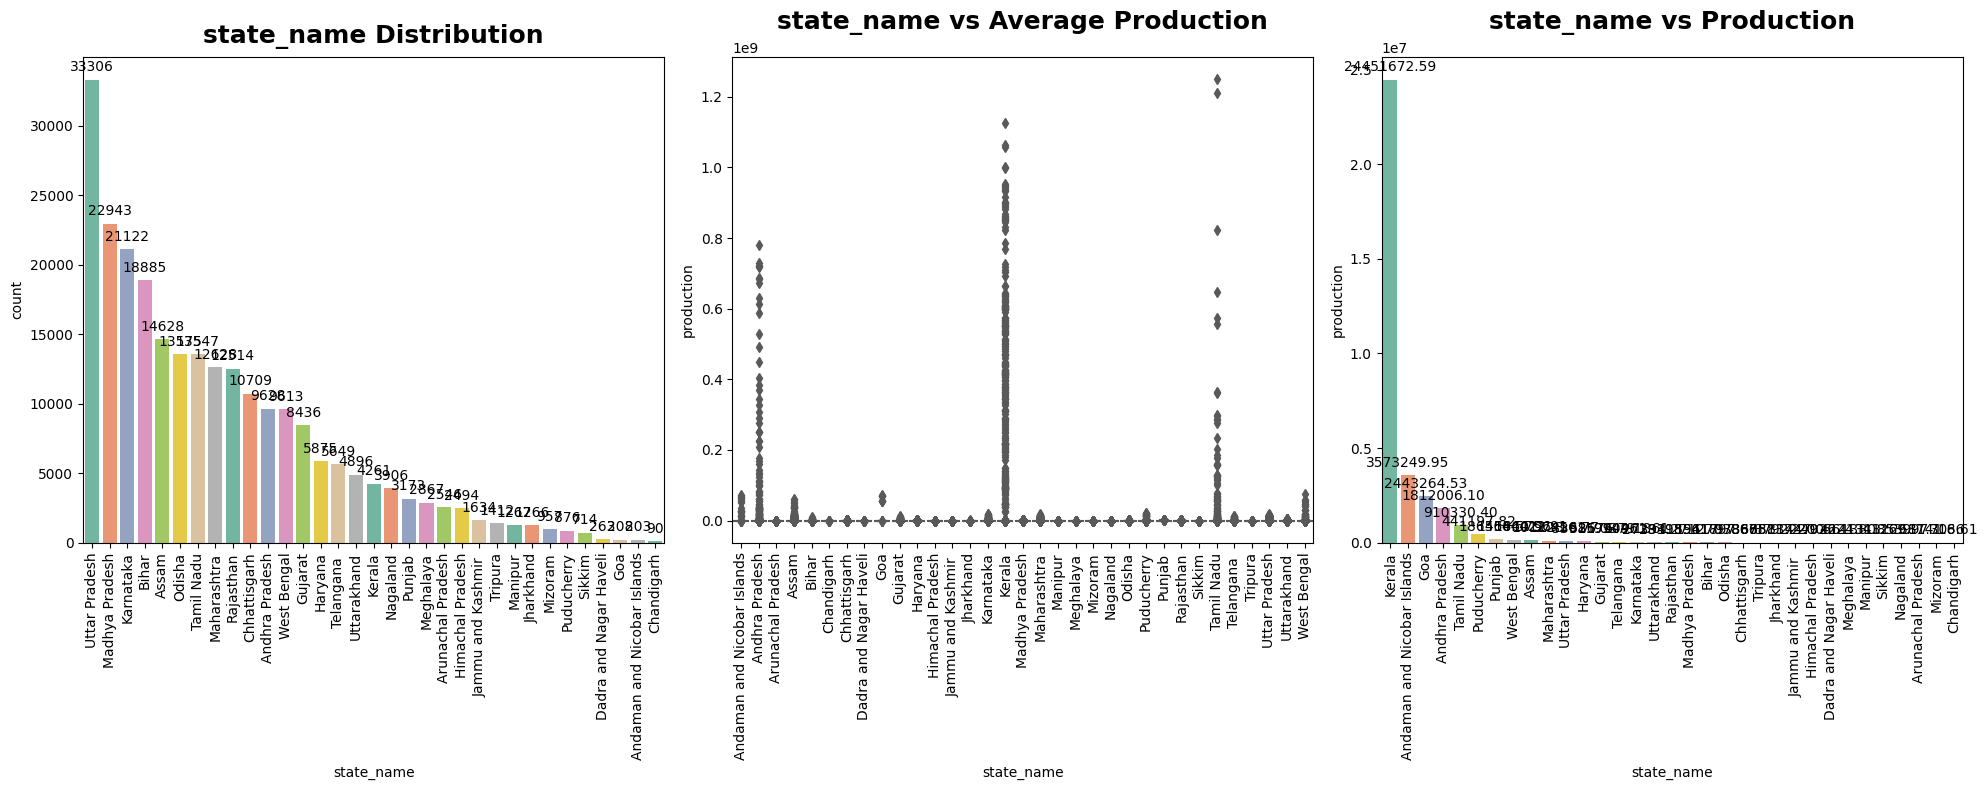

In [9]:
# Define the visualization function
def visualization(cols):
    plt.figure(figsize=(20, 8))
    
    # Plot 1: Count plot
    plt.subplot(1, 3, 1)
    count_plot = sns.countplot(x=cols, data=df1, palette="Set2", order=df1[cols].value_counts().index)
    plt.title(f"{cols} Distribution", pad=10, fontweight="black", fontsize=18)
    plt.xticks(rotation=90)
    
    # Annotate count plot with specific numbers
    for p in count_plot.patches:
        count_plot.annotate(format(p.get_height(), '.0f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')

    # Plot 2: Box plot
    plt.subplot(1, 3, 2)
    box_plot = sns.boxplot(x=cols, y="production", data=df1, palette="Set2")
    plt.title(f"{cols} vs Average Production", pad=20, fontweight="black", fontsize=18)
    plt.xticks(rotation=90)
    
    # Plot 3: Bar plot
    plt.subplot(1, 3, 3)
    x = pd.DataFrame(df1.groupby(cols)["production"].mean().sort_values(ascending=False))
    bar_plot = sns.barplot(x=x.index, y="production", data=x, palette="Set2")
    plt.title(f"{cols} vs Production", pad=20, fontweight="black", fontsize=18)
    plt.xticks(rotation=90)
    
    # Annotate bar plot with specific numbers
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.2f'), 
                          (p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()
visualization("state_name")

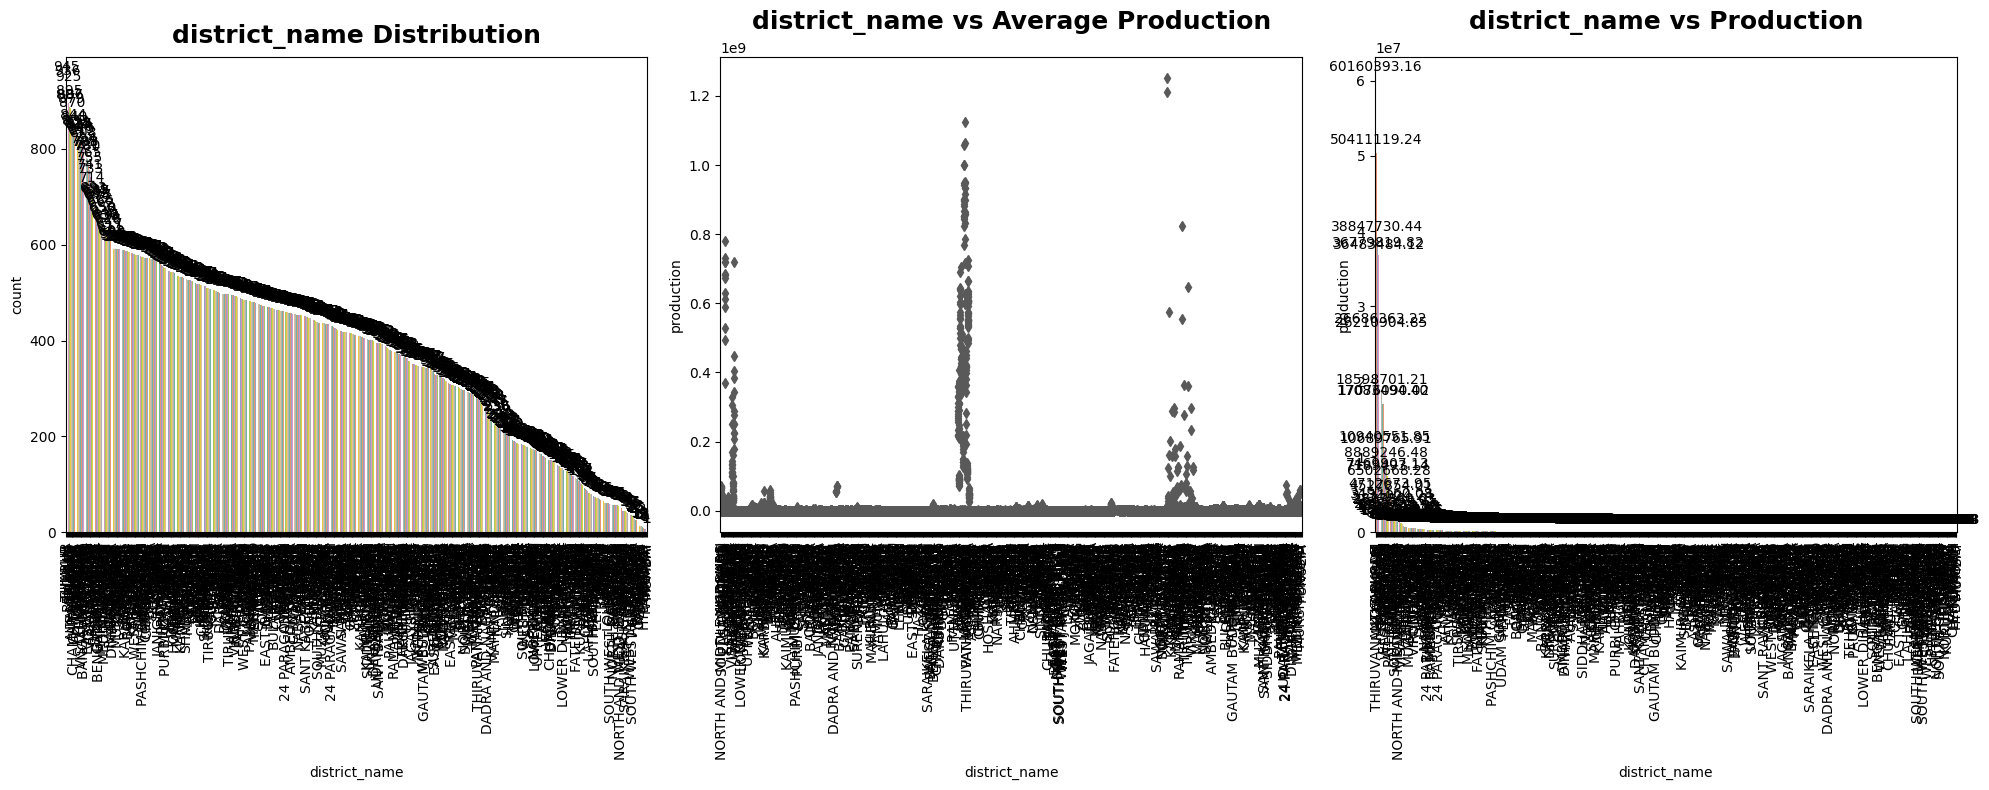

In [10]:
visualization('district_name')

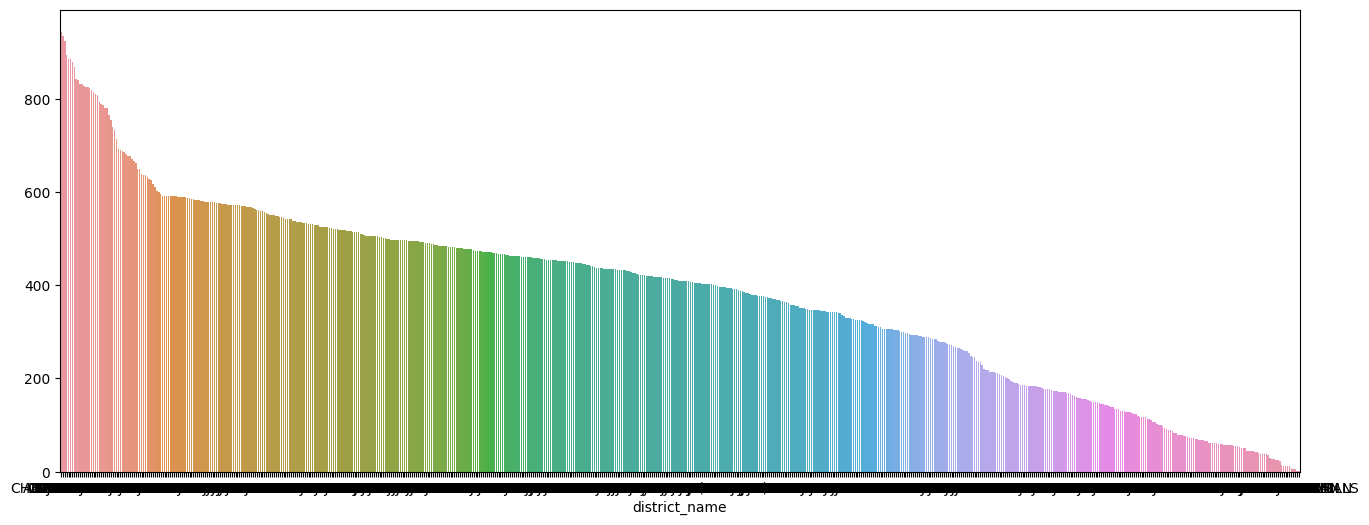

In [11]:
def index(df1, col_name):
    plt.figure(figsize=(16, 6))
    counts = df1[col_name].value_counts()
    sns.barplot(x=counts.index, y=counts.values)
    plt.xlabel(col_name)
    plt.show()

# Assuming 'df' is your DataFrame
index(df1, 'district_name')

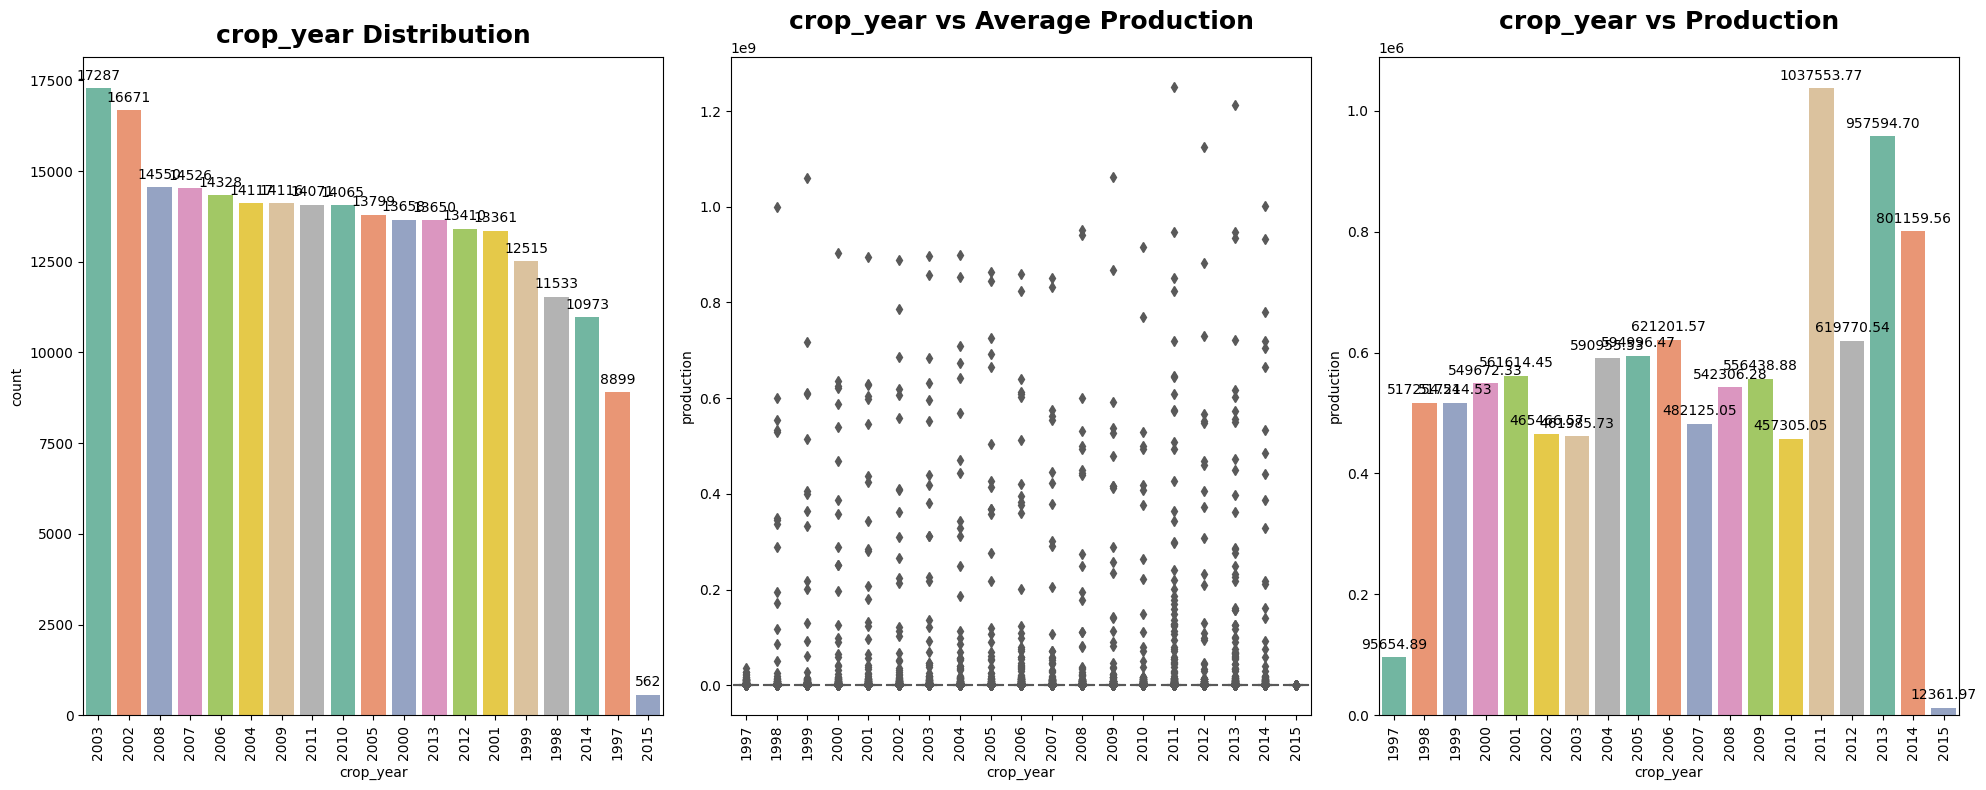

In [12]:
visualization('crop_year')

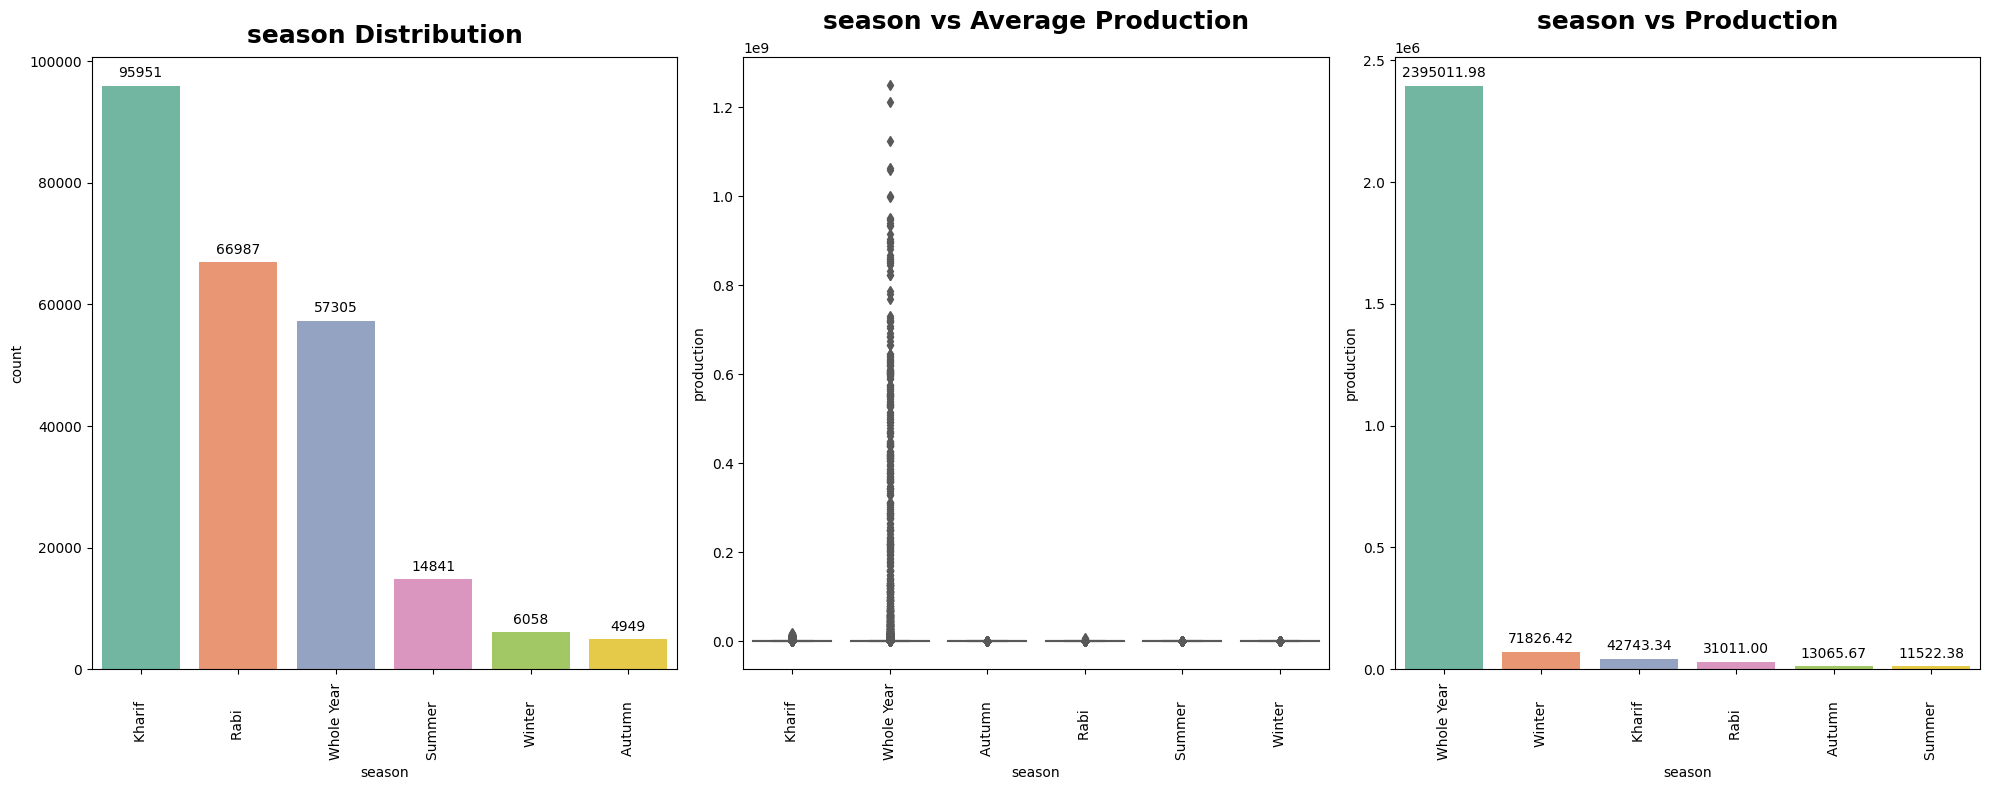

In [13]:
visualization('season')

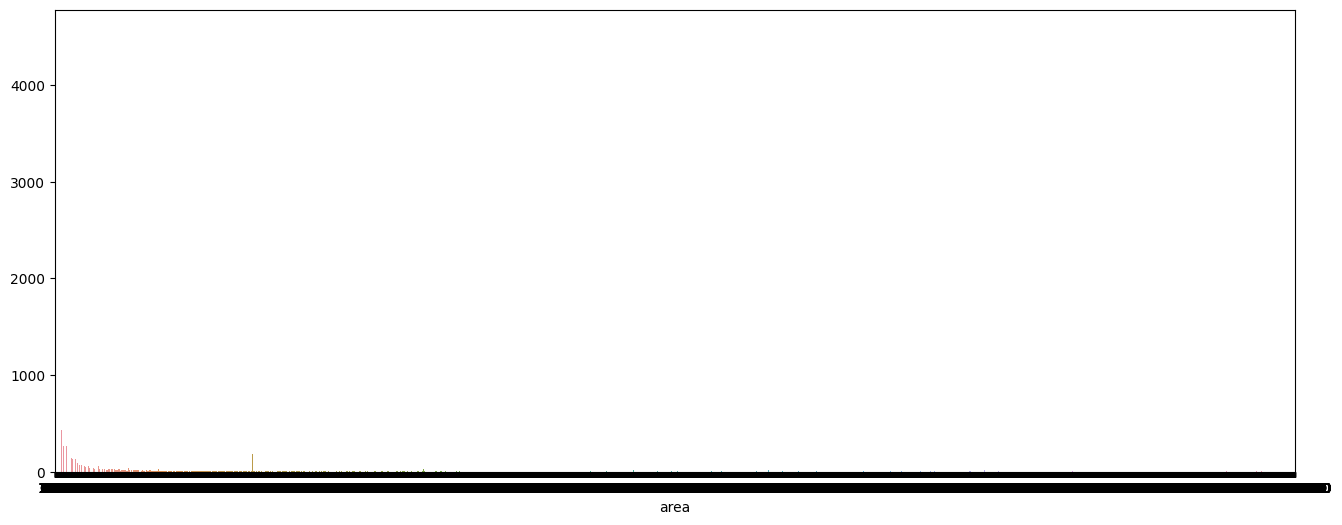

In [16]:
def index(df1, col_name):
    plt.figure(figsize=(16, 6))
    counts = df1[col_name].value_counts()
    sns.barplot(x=counts.index, y=counts.values)
    plt.xlabel(col_name)
    plt.show()

# Assuming 'df' is your DataFrame
index(df1, 'area')

In [ ]:
def index(df1, col_name):
    plt.figure(figsize=(16, 6))
    counts = df1[col_name].value_counts()
    sns.barplot(x=counts.index, y=counts.values)
    plt.xlabel(col_name)
    plt.show()

# Assuming 'df' is your DataFrame
index(df1, 'production')

In [15]:
df1.columns

Index(['state_name', 'district_name', 'crop_year', 'season', 'crop', 'area',
       'production'],
      dtype='object')